In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
from pandas.plotting import parallel_coordinates

In [2]:
# Load the dataset
df = pd.read_excel("C:\\Users\\user\\AppData\\Local\\Temp\\efb504be-a136-4fb1-b71b-26aa669e92d7_Association Rules.zip.2d7\\Association Rules\\Online retail.xlsx")


In [3]:
# Inspect the DataFrame
print("Columns in DataFrame:", df.columns)
print("Data Types:", df.dtypes)
print("Sample Data:", df.head())

Columns in DataFrame: Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')
Data Types: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    object
dtype: object
Sample Data:   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1 

In [4]:
# Assuming the column with itemsets is the only column
# Convert the single column into a list of items for each transaction
df['items'] = df[df.columns[0]].apply(lambda x: x.split(','))

In [5]:
# Create a basket matrix
basket = df['items'].apply(pd.Series).stack().reset_index(level=1, drop=True).rename('item')
basket = basket.reset_index().groupby(['index', 'item'])['item'].count().unstack().reset_index().fillna(0).set_index('index')


In [6]:
# Convert basket to boolean DataFrame
basket = basket.applymap(lambda x: True if x > 0 else False)

# Confirm the transformation
print(basket.head())

item    asparagus  almonds  antioxydant juice  asparagus  avocado  \
index                                                               
0           False    False              False      False    False   
1           False    False              False      False    False   
2           False    False              False      False     True   
3           False    False              False      False    False   
4           False    False              False      False    False   

item   babies food  bacon  barbecue sauce  black tea  blueberries  ...  \
index                                                              ...   
0            False  False           False      False        False  ...   
1            False  False           False      False        False  ...   
2            False  False           False      False        False  ...   
3            False  False           False      False        False  ...   
4            False  False           False      False        False  ...  

In [7]:
# Association Rule Mining
# Apply apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)


In [8]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

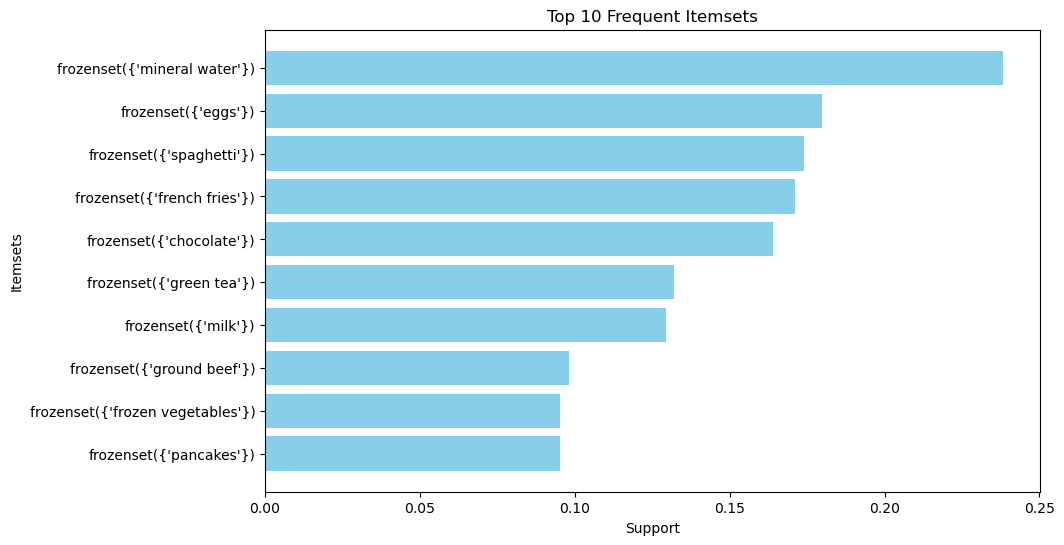

In [9]:
# Plotting

# 1. Bar Chart of Top Frequent Itemsets
top_itemsets = frequent_itemsets.nlargest(10, 'support')

plt.figure(figsize=(10, 6))
plt.barh(top_itemsets['itemsets'].astype(str), top_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.show()

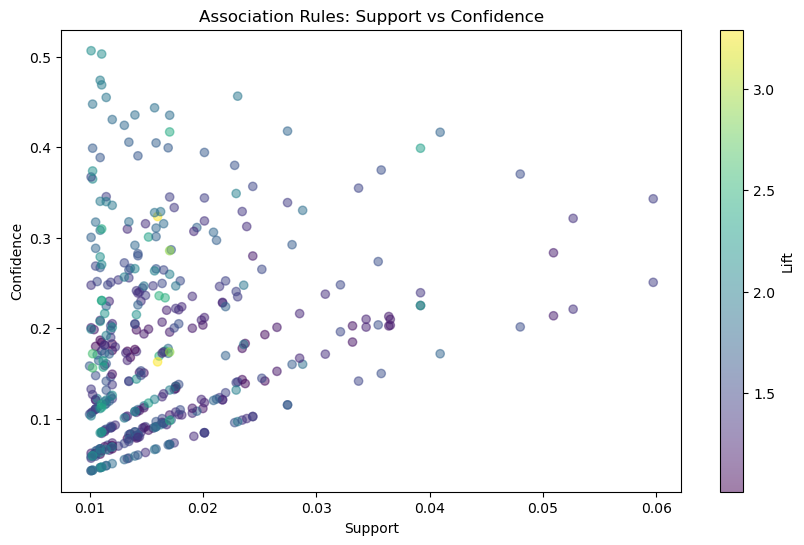

In [10]:

# 2. Scatter Plot of Association Rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()

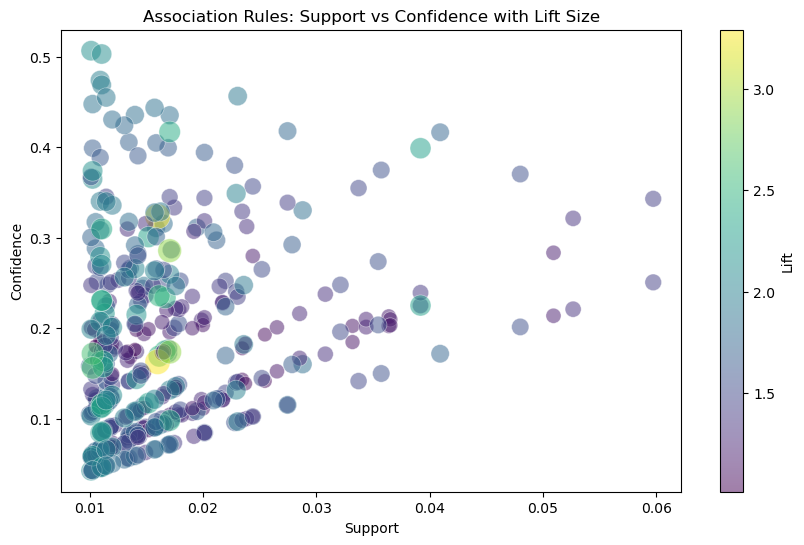

In [11]:
# 3. Scatter Plot with Lift as Size
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, s=rules['lift']*100, c=rules['lift'], cmap='viridis', edgecolors='w', linewidth=0.5)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence with Lift Size')
plt.show()


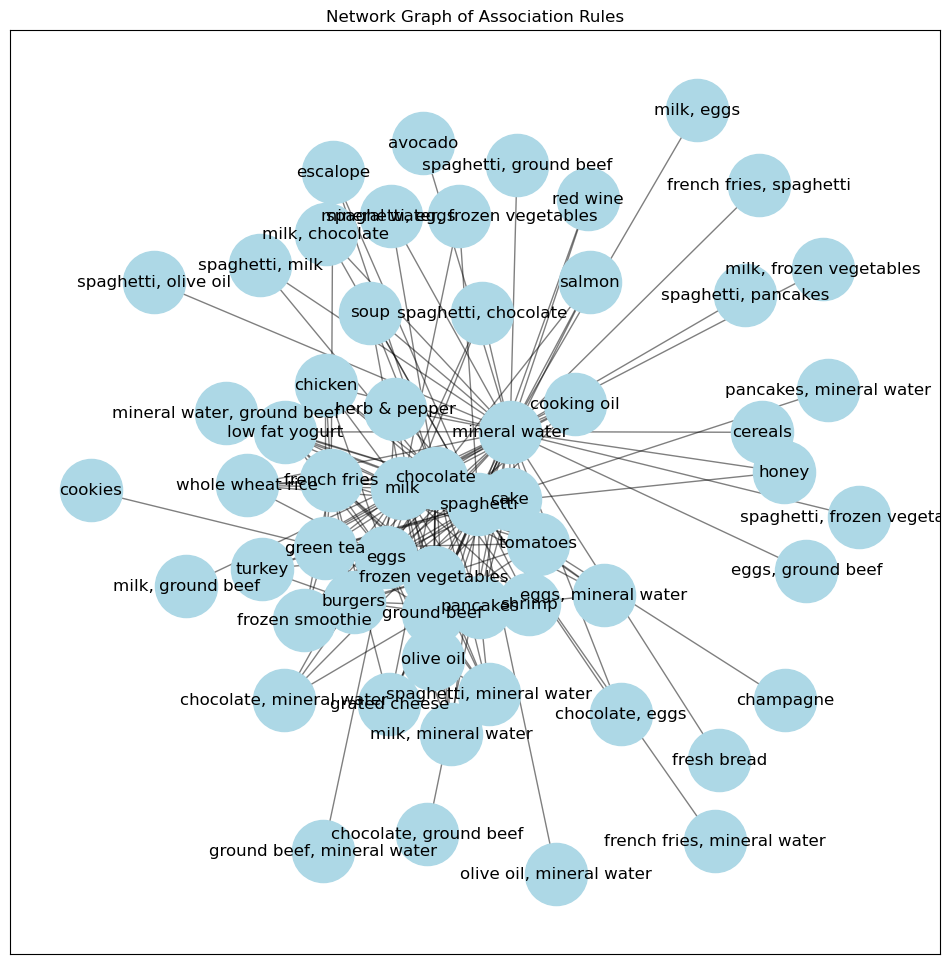

In [12]:
# 4. Network Graph of Itemsets
G = nx.Graph()

# Add nodes and edges
for _, rule in rules.iterrows():
    antecedent = ', '.join(list(rule['antecedents']))
    consequent = ', '.join(list(rule['consequents']))
    G.add_node(antecedent)
    G.add_node(consequent)
    G.add_edge(antecedent, consequent, weight=rule['lift'])

# Draw the network
pos = nx.spring_layout(G, k=0.5, iterations=20)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title('Network Graph of Association Rules')
plt.show()

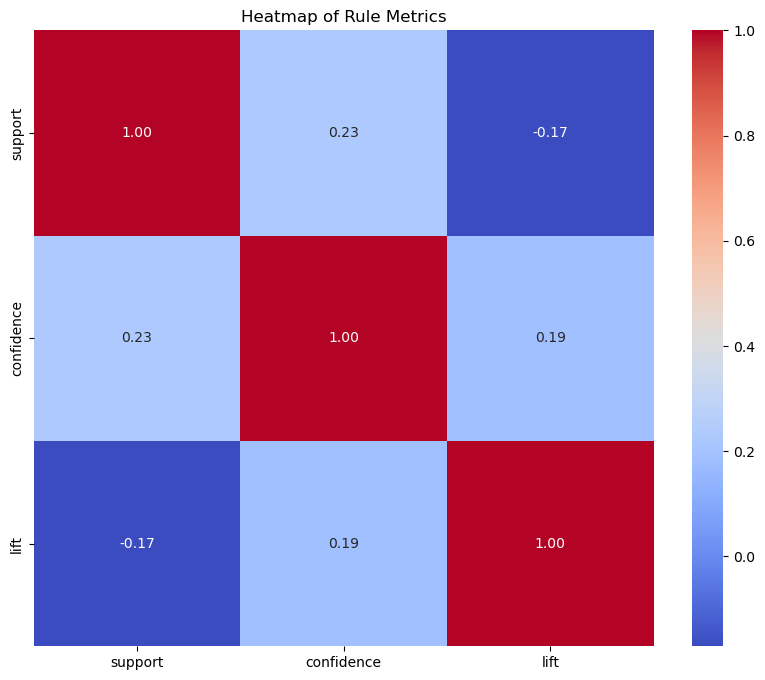

In [13]:
# 5. Heatmap of Rule Metrics
heatmap_data = rules[['support', 'confidence', 'lift']]

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Rule Metrics')
plt.show()

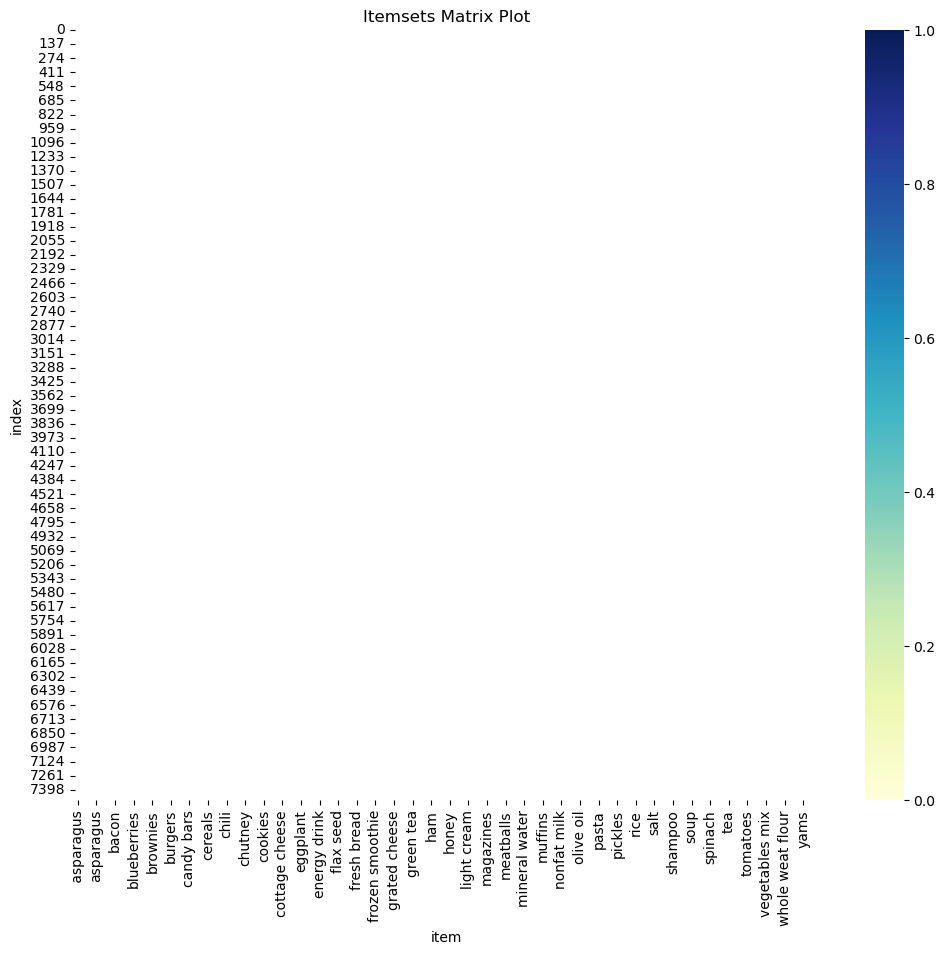

In [14]:

# 6. Matrix Plot of Itemsets
plt.figure(figsize=(12, 10))
sns.heatmap(basket, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Itemsets Matrix Plot')
plt.show()

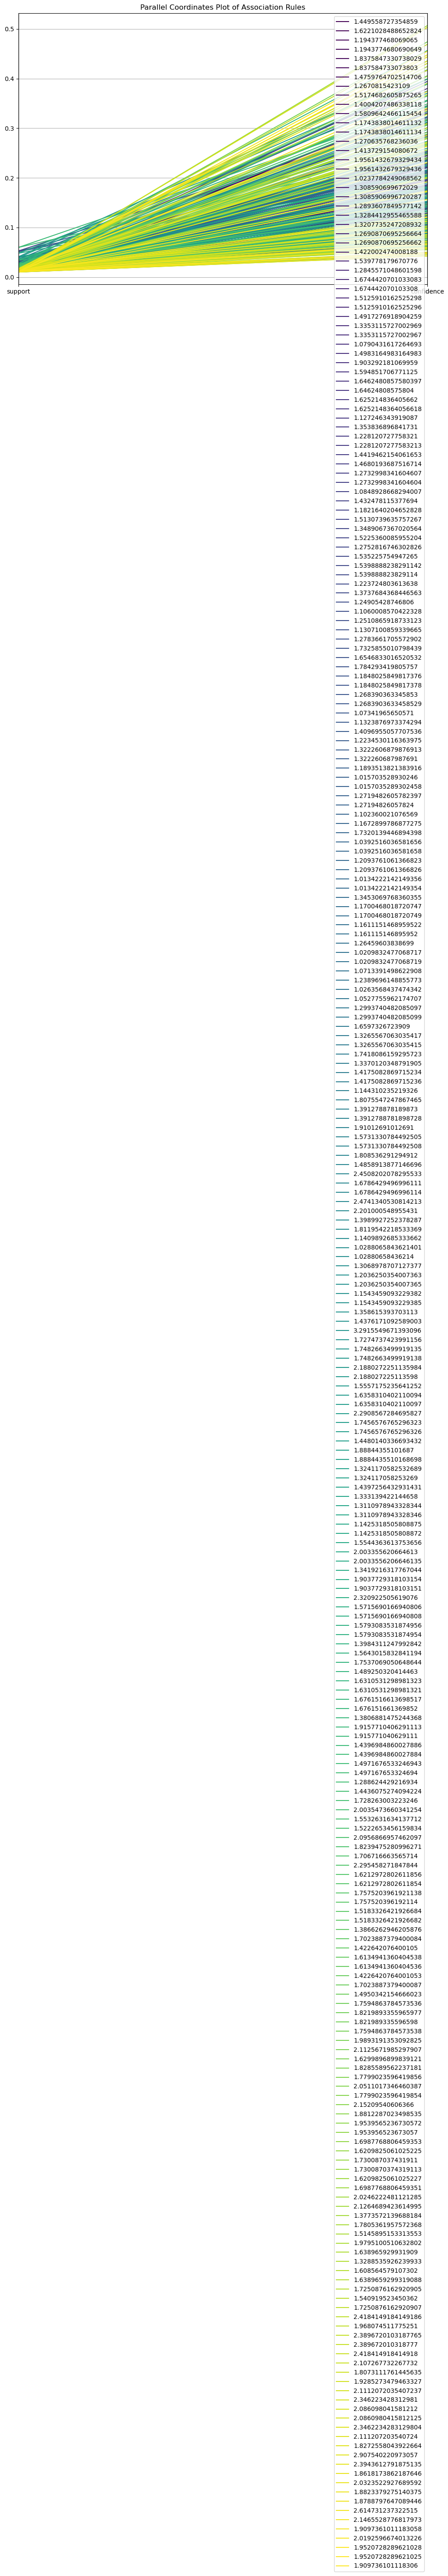

In [15]:
# 7. Parallel Coordinates Plot
plt.figure(figsize=(12, 8))
parallel_coordinates(rules[['support', 'confidence', 'lift']], class_column='lift', colormap='viridis')
plt.title('Parallel Coordinates Plot of Association Rules')
plt.show()

In [ ]:
Interview Questions:
===================
1.What is lift and why is it important in Association rules?

Lift measures the strength of a rule compared to random chance. It is the ratio of the observed support to the expected support if the items were independent. A lift value greater than 1 indicates a strong association between the items.

2.What is support and Confidence? How do you calculate them?

Support is the proportion of transactions in the dataset that contain the itemset. It is calculated as:

Support(𝑋)=Number of transactions containing 𝑋/Total number of transactions

 
Confidence is the likelihood that the consequent of a rule is purchased when the antecedent is purchased. It is calculated as:

Confidence(𝐴→𝐵)=Support(𝐴∪𝐵)/Support(𝐴)

3.What are some limitations or challenges of Association rules mining?

Scalability: As the dataset grows, the number of potential rules increases exponentially, which can be computationally expensive.
Interpreting Rules: Identifying meaningful and actionable rules from a large number of generated rules can be challenging.
Sparsity: In many cases, the dataset may be sparse, leading to rules with low support and confidence.
Data Quality: Poor data quality, such as missing values or noise, can affect the quality of the generated rules.